### 
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.
Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [1]:
import pandas as pd
import numpy as np

energy = pd.ExcelFile('Energy Indicators.xls').parse(skiprows=17,skip_footer=(38))
energy=energy[['Unnamed: 2','Petajoules','Gigajoules','%']]
energy.columns=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']] =  energy[['Energy Supply', 'Energy Supply per Capita', '% Renewable']].replace('...',np.NaN).apply(pd.to_numeric)
energy['Energy Supply']=energy['Energy Supply']*1000000
energy['Country'] = energy['Country'].str.replace(r" \(.*\)","")
energy['Country'] = energy['Country'].str.replace("\d+","")
energy['Country'] = energy['Country'].replace('Iran, Islamic Rep.','Iran')
energy['Country'] = energy['Country'].replace({'China, Hong Kong Special Administrative Region':'Hong Kong','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Republic of Korea':'South Korea','United States of America':'United States'})
energy.head(10)


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650
5,Angola,6.420000e+08,27.0,70.909090
6,Anguilla,2.000000e+06,136.0,0.000000
7,Antigua and Barbuda,8.000000e+06,84.0,0.000000
8,Argentina,3.378000e+09,79.0,24.064520
9,Armenia,1.430000e+08,48.0,28.236060


In [2]:
energy['Renewable']=energy['Energy Supply']*energy['% Renewable']
Top=energy.sort_values(['Renewable'],ascending=False).iloc[0:7]
Others=energy['Renewable'].sum()-Top['Renewable'].sum()
Top

,Country,Energy Supply,Energy Supply per Capita,% Renewable,Renewable
42,China,1.271910e+11,93.0,19.75491,2.512647e+12
216,United States,9.083800e+10,286.0,11.57098,1.051085e+12
28,Brazil,1.214900e+10,59.0,69.64803,8.461539e+11
37,Canada,1.043100e+10,296.0,61.94543,6.461528e+11
168,Russian Federation,3.070900e+10,214.0,17.28868,5.309181e+11
96,India,3.319500e+10,26.0,14.96908,4.968986e+11
79,Germany,1.326100e+10,165.0,17.90153,2.373922e+11


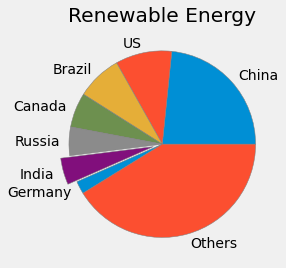

In [3]:
from matplotlib import pyplot as plt 
top=[]
for char in Top['Renewable']:
    top.append(char)
top.append(Others)
plt.style.use('fivethirtyeight')
labels=['China','US','Brazil','Canada','Russia','India','Germany','Others']
plt.pie(top,explode=[0,0,0,0,0,0.1,0,0],labels=labels,wedgeprops={'edgecolor':'Grey'})
plt.title('Renewable Energy')
plt.show()



In [4]:
GDP=pd.read_csv('world_bank.csv',skiprows=4)
GDP['Country Name'] = GDP['Country Name'].replace({'Korea, Rep.':'South Korea','Iran, Islamic Rep.':'Iran','Hong Kong SAR, China':'Hong Kong'})
GDP.rename(columns={'Country Name':'Country'},inplace=True)
GDP
GDP[GDP['Country']=='India'][['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]

,Country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
107,India,9.402599e+11,1.216735e+12,1.198896e+12,1.341887e+12,1.675615e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12


In [5]:
GDP_Plot=GDP[['Country','1991','1993','1995','1997','1999','2001','2003','2005','2007','2009','2011','2013','2015']]
GDP_Plot.sort_values('2015',ascending=False,inplace=True)
GDP_Plot=GDP_Plot.loc[[249,38,117,53,79,75,107,114,27,33]]
GDP_Plot.set_index('Country',inplace=True)
GDP_Plot=GDP_Plot[['1991','1993','1995','1997','1999','2001','2003','2005','2007','2009','2011','2013','2015']].applymap(lambda x:x/1000000000)
GDP_Plot['GDP Growth 1991-2003']=(GDP_Plot['2003']-GDP_Plot['1991'])/GDP_Plot['1991']
GDP_Plot['GDP Growth 2003-2015']=(GDP_Plot['2015']-GDP_Plot['2003'])/GDP_Plot['2003']
GDP_Plot



,1991,1993,1995,1997,1999,2001,2003,2005,2007,2009,2011,2013,2015,GDP Growth 1991-2003,GDP Growth 2003-2015
Country,,,,,,,,,,,,,,,
United States,6158.129000,6858.559000,7639.749000,8577.554463,9630.664202,10581.821399,11458.243878,13036.640229,14451.858650,14448.933025,15542.581104,16784.849190,18219.297584,0.860670,0.590060
China,383.373318,444.731282,734.547898,961.603953,1093.997267,1339.395719,1660.287966,2285.965892,3550.342425,5101.702433,7551.500426,9570.405759,11015.542352,3.330734,5.634718
Japan,3584.420077,4454.143877,5449.116305,4414.732844,4562.078822,4303.544260,4445.658071,4755.410631,4515.264514,5231.382675,6157.459595,5155.717056,4389.475623,0.240273,-0.012638
Germany,1868.945197,2071.323790,2585.792275,2211.989623,2194.204134,1944.107383,2496.128668,2845.802761,3421.229127,3397.791053,3744.408603,3732.743446,3360.549974,0.335582,0.346305
United Kingdom,1142.797178,1061.388722,1341.584346,1559.078258,1682.399288,1640.246149,2053.018776,2538.680000,3100.882353,2410.909799,2659.310055,2786.022873,2928.591002,0.796486,0.426480
France,1269.276828,1322.815613,1601.094756,1452.884918,1492.647560,1376.465324,1840.480813,2196.126104,2657.213249,2690.222284,2861.408170,2811.077726,2438.207896,0.450023,0.324767
India,270.105342,279.296023,360.281953,415.867754,458.820417,485.441015,607.699285,820.381596,1216.735442,1341.886603,1823.050405,1856.722121,2103.587814,1.249860,2.461560
Italy,1246.220155,1064.958076,1174.662071,1241.879604,1252.023759,1167.012796,1574.145824,1857.524313,2210.292636,2191.241873,2291.991046,2141.315327,1835.899237,0.263136,0.166283
Brazil,602.860000,437.798578,769.305386,883.199625,599.388580,559.372276,558.319921,891.630177,1397.084350,1667.019784,2616.200980,2472.806920,1802.214374,-0.073881,2.227924


In [6]:
GDP_Plot.sort_values(['2015'],ascending=False,inplace=True)
gdp=GDP_Plot.iloc[0:10]['2015']
list=[]
for char in gdp:
    list.append(char)


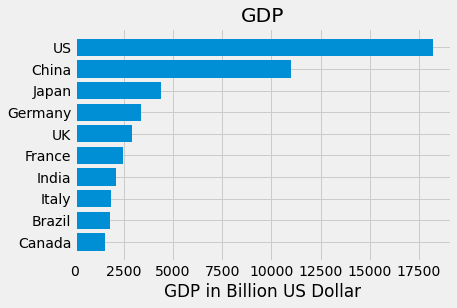

In [7]:
countries=['US','China','Japan' ,'Germany','UK','France','India','Italy','Brazil','Canada']
countries.reverse()
list.reverse()
plt.style.use('fivethirtyeight')
plt.barh(countries,list)
plt.xlabel('GDP in Billion US Dollar')
plt.title('GDP')
plt.show()

In [8]:
#GDP_Plot.to_csv(r'C:\Users\saurabh\Documents\Desktop\Data Science projects\Energy\GDP_top.csv')

In [9]:
ScimEn = pd.read_excel(io='scimagojr-3.xlsx')
GDP = GDP[['Country','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
ScimEn_15 = ScimEn[:15]
df = pd.merge(energy,GDP,how='inner',left_on='Country',right_on='Country')
final_df = pd.merge(df,ScimEn_15,how='inner',left_on='Country',right_on='Country')
final_df=final_df.set_index('Country').sort_values('Rank')
final_df

,Energy Supply,Energy Supply per Capita,% Renewable,Renewable,2006,2007,2008,2009,2010,2011,...,2014,2015,Rank,Region,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,,,,,,,,,,,,,,,
China,1.271910e+11,93.0,19.754910,2.512647e+12,2.752132e+12,3.550342e+12,4.594307e+12,5.101702e+12,6.087165e+12,7.551500e+12,...,1.043853e+13,1.101554e+13,1,Asiatic Region,235126,233883,1909601,1306438,8.12,224
United States,9.083800e+10,286.0,11.570980,1.051085e+12,1.381461e+13,1.445186e+13,1.471284e+13,1.444893e+13,1.499205e+13,1.554258e+13,...,1.752175e+13,1.821930e+13,2,Northern America,157811,154288,1940563,639345,12.30,333
Japan,1.898400e+10,149.0,10.232820,1.942599e+11,4.530377e+12,4.515265e+12,5.037908e+12,5.231383e+12,5.700098e+12,6.157460e+12,...,4.850414e+12,4.389476e+12,3,Asiatic Region,46032,45559,436961,109968,9.49,181
India,3.319500e+10,26.0,14.969080,4.968986e+11,9.402599e+11,1.216735e+12,1.198896e+12,1.341887e+12,1.675615e+12,1.823050e+12,...,2.039127e+12,2.103588e+12,4,Asiatic Region,39893,38848,368175,123446,9.23,171
United Kingdom,7.920000e+09,124.0,10.600470,8.395572e+10,2.713750e+12,3.100882e+12,2.922667e+12,2.410910e+12,2.475244e+12,2.659310e+12,...,3.063803e+12,2.928591e+12,5,Western Europe,38873,37780,536378,100038,13.80,208
Germany,1.326100e+10,165.0,17.901530,2.373922e+11,2.992197e+12,3.421229e+12,3.730028e+12,3.397791e+12,3.396354e+12,3.744409e+12,...,3.883920e+12,3.360550e+12,6,Western Europe,32935,32227,367356,78265,11.15,186
Russian Federation,3.070900e+10,214.0,17.288680,5.309181e+11,9.899305e+11,1.299706e+12,1.660846e+12,1.222644e+12,1.524917e+12,2.051662e+12,...,2.059984e+12,1.363594e+12,7,Eastern Europe,31880,31664,91906,42529,2.88,84
Canada,1.043100e+10,296.0,61.945430,6.461528e+11,1.315415e+12,1.464977e+12,1.549131e+12,1.371153e+12,1.613543e+12,1.789141e+12,...,1.801480e+12,1.552900e+12,8,Northern America,29633,29011,491467,88987,16.59,210
Italy,6.530000e+09,109.0,33.667230,2.198470e+11,1.947920e+12,2.210293e+12,2.398857e+12,2.191242e+12,2.134018e+12,2.291991e+12,...,2.159134e+12,1.835899e+12,9,Western Europe,23725,22819,312631,76446,13.18,155


In [10]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

###
Average GDP over the last 10 years for each country


In [11]:
Top15 = final_df
avgGDP = Top15[['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].mean(axis=1).sort_values(ascending=False)
avgGDP


Country
United States         1.566858e+13
China                 6.919386e+12
Japan                 5.177131e+12
Germany               3.518657e+12
United Kingdom        2.776607e+12
France                2.687371e+12
Italy                 2.139775e+12
Brazil                1.988885e+12
Russian Federation    1.668067e+12
Canada                1.612373e+12
India                 1.602352e+12
Spain                 1.398587e+12
Australia             1.206526e+12
South Korea           1.165810e+12
Iran                  4.393498e+11
dtype: float64

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [12]:
Top15 = final_df
Top15['Mean'] = Top15[['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].mean(axis=1)
Top15.sort_values('Mean',ascending=False,inplace=True)
Index=Top15.index[5]
ans=Top15.loc[Index,'2015']-Top15.loc[Index,'2006']
ans

119614244263.37988

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [13]:
Top15 = final_df
Top15['Energy Supply per Capita'].mean()


157.6

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [14]:
Top15 = final_df
first=Top15.sort_values('% Renewable', ascending=False).iloc[0]
(first.name,first['% Renewable'])

('Brazil', 69.64803)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [15]:
Top15 = final_df
Top15['Ratio_citations']=Top15['Self-citations']/Top15['Citations']
Ratio=Top15.sort_values('Ratio_citations', ascending=False).iloc[0]
(Ratio.name,Ratio['Ratio_citations'])

('China', 0.6841418704745127)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [16]:
Top15 = final_df
Top15['Est_Population']=Top15['Energy Supply']/Top15['Energy Supply per Capita']
Top15.sort_values('Est_Population',ascending=False).iloc[2].name

'United States'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [17]:
Top15 = final_df
Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
ans = Top15['Citable docs per Capita'].corr(Top15['Energy Supply per Capita'])
ans

0.7467513245295705

In [18]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = final_df
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

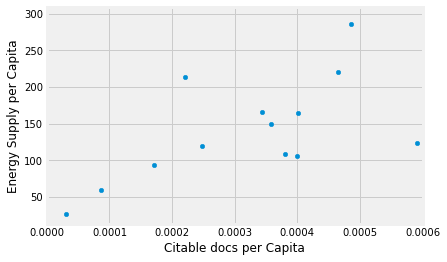

In [19]:
plot9() # Be sure to comment out plot9() before submitting the assignment!

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [20]:
Top15 = final_df
Median=Top15['% Renewable'].median()
Top15['HighRenew']=[1 if x>=Median else 0 for x in Top15['% Renewable']]
Top15['HighRenew']

Country
United States         0
China                 1
Japan                 0
Germany               1
United Kingdom        0
France                1
Italy                 1
Brazil                1
Russian Federation    1
Canada                1
India                 0
Spain                 1
Australia             0
South Korea           0
Iran                  0
Name: HighRenew, dtype: int64

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [21]:
Top15 = final_df
import pandas as pd
import numpy as np
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    
Top15['Pop_Estimate'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita']).astype(float)
Top15 = Top15.reset_index()
Top15['Continent'] = [ContinentDict[country] for country in Top15['Country']]
new_df = Top15.set_index('Continent')
new_df=new_df.groupby(level=0)['Pop_Estimate'].agg(mean='mean')
new_df

,mean
Continent,
Asia,5.797333e+08
Australia,2.331602e+07
Europe,7.632161e+07
North America,1.764276e+08
South America,2.059153e+08


### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [22]:
Top15 =final_df
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    
Top15['Pop_Estimate'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita']).astype(float)
Top15 = Top15.reset_index()
Top15['Continent'] = [ContinentDict[country] for country in Top15['Country']]
Top15['bins'] = pd.cut(Top15['% Renewable'],5)
Top15.groupby(['Continent','bins']).size()
   

Continent      bins            
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Australia      (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
               (42.701, 56.174]    0
               (56.174, 69.648]    0
North America  (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
South America  (2.212, 15.753]     0
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
dtype: int64

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [23]:
Top15 = final_df
Top15['PopEst'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita']).astype(float)
Top15['PopEst'].apply(lambda x: '{0:,}'.format(x))


Country
United States          317,615,384.61538464
China                 1,367,645,161.2903225
Japan                  127,409,395.97315437
Germany                 80,369,696.96969697
United Kingdom         63,870,967.741935484
France                  63,837,349.39759036
Italy                  59,908,256.880733944
Brazil                 205,915,254.23728815
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
India                 1,276,730,769.2307692
Spain                    46,443,396.2264151
Australia              23,316,017.316017315
South Korea            49,805,429.864253394
Iran                    77,075,630.25210084
Name: PopEst, dtype: object

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [24]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

In [25]:
plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!

NameError: name 'answer_one' is not defined